In [1]:
import os

from datasets_wlr import WLRZhuangEpisodeDataset
from curobo.types.robot import RobotConfig
from xvla_wlr.model import DATA_DOMAIN_ID


dataset = WLRZhuangEpisodeDataset("samples/2026-01-21_demo_clothes/episode_0/data.json")
robot_config = RobotConfig.from_basic(
    f"{os.getcwd()}/robots/piper_ros/src/piper_description/urdf/piper_description.urdf",
    base_link="base_link",
    ee_link="link8",
)
domain_id = DATA_DOMAIN_ID["robomind-agilex"]

kinematics_fused_cu not found, JIT compiling...


In [2]:
from xvla_wlr.dataset import XVLAWLRZhuangEpisodeDataset

xvla_dataset = XVLAWLRZhuangEpisodeDataset(
    dataset=dataset,
    robot_config=robot_config,
    domain_id=domain_id,
    num_action_steps=2,
)

geom_cu binary not found, jit compiling...
lbfgs_step_cu not found, JIT compiling...
line_search_cu not found, JIT compiling...
tensor_step_cu not found, jit compiling...


In [4]:
len(xvla_dataset._dataset)

1030

In [5]:
observation, action = xvla_dataset[:16]

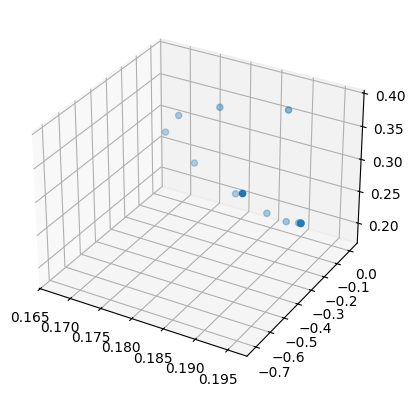

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a = observation.ee_transform[..., 0, :3, 3].numpy(force=True)
ax.scatter(a[..., 0], a[..., 1], a[..., 2])

In [3]:
from xvla_wlr.dataset import XVLAWLRZhuangEpisodeDataset

xvla_dataset = XVLAWLRZhuangEpisodeDataset(
    dataset=dataset,
    robot_config=robot_config,
    domain_id=domain_id,
    num_action_steps=2,
    num_action_substeps=2,
)

In [7]:
len(xvla_dataset)

515

In [4]:
observation, action = xvla_dataset[:]

In [5]:
observation.ee_transform.shape

torch.Size([515, 2, 4, 4])

In [6]:
action.ee_transforms.shape

torch.Size([515, 2, 2, 4, 4])